# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Vector-space" data-toc-modified-id="Vector-space-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vector space</a></div><div class="lev2 toc-item"><a href="#Vector-space" data-toc-modified-id="Vector-space-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vector space</a></div><div class="lev2 toc-item"><a href="#Span" data-toc-modified-id="Span-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Span</a></div><div class="lev2 toc-item"><a href="#Four-fundamental-subspaces" data-toc-modified-id="Four-fundamental-subspaces-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Four fundamental subspaces</a></div><div class="lev2 toc-item"><a href="#Effects-of-matrix-multiplication-on-column/row-space" data-toc-modified-id="Effects-of-matrix-multiplication-on-column/row-space-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Effects of matrix multiplication on column/row space</a></div><div class="lev2 toc-item"><a href="#Essential-disjointness-of-four-fundamental-subspaces" data-toc-modified-id="Essential-disjointness-of-four-fundamental-subspaces-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Essential disjointness of four fundamental subspaces</a></div><div class="lev2 toc-item"><a href="#Basis-of-a-subspace" data-toc-modified-id="Basis-of-a-subspace-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Basis of a subspace</a></div>

# Vector space

In [1]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()

  Activating environment at `~/Documents/github.com/ucla-biostat216-2021fall.github.io/slides/04-vecsp/Project.toml`


In [2]:
using Plots

## Vector space

- A **vector space** or **linear space** or **linear subspace** or **subspace** $\mathcal{S} \subseteq \mathbb{R}^n$ is a set of vectors in $\mathbb{R}^n$ that are closed under addition and scalar multiplication. In other words, $\mathcal{S}$ must satisfy  
    1. If $\mathbf{x}, \mathbf{y} \in \mathcal{S}$, then $\mathbf{x} + \mathbf{y} \in \mathcal{S}$.  
    2. If $\mathbf{x} \in \mathcal{S}$, then $\alpha \mathbf{x} \in \mathcal{S}$ for any $\alpha \in \mathbb{R}$.    
    Or equivalently the set is closed under _axpy_ operation. $\alpha \mathbf{x} + \mathbf{y} \in \mathcal{S}$ for all $\mathbf{x}, \mathbf{y} \in \mathcal{S}$ and $\alpha \in \mathbb{R}$.

- Any vector space must contain the zero vector $\mathbf{0}$ (why?).

- Examples of vector space:  
    - Origin: $\{\mathbf{0}\}$.  
    - Line passing origin: $\{\alpha \mathbf{x}: \alpha \in \mathbb{R}\}$ for a fixed vector $\mathbf{x} \in \mathbb{R}^n$.  
    - Plane passing origin: $\{\alpha_1 \mathbf{x}_1 + \alpha_2 \mathbf{x}_2: \alpha_1, \alpha_2 \in \mathbb{R}\}$ for two fixed vectors $\mathbf{x}_1, \mathbf{x}_2 \in \mathbb{R}^n$.
    - Euclidean space: $\mathbb{R}^n$.

* Order and dimension. The **order** of a vector space is simply the length of the vectors in that space. Not to be confused with the **dimension** of a vector space, which we later define as the maximum number of linearly independent vectors in that space.

* Two vector spaces $\mathcal{S}_1$ and $\mathcal{S}_2$ are **essentially disjoint** or **virtually disjoint** if the only element in $\mathcal{S}_1 \cap \mathcal{S}_2$ is the zero vector $\mathbf{0}$.

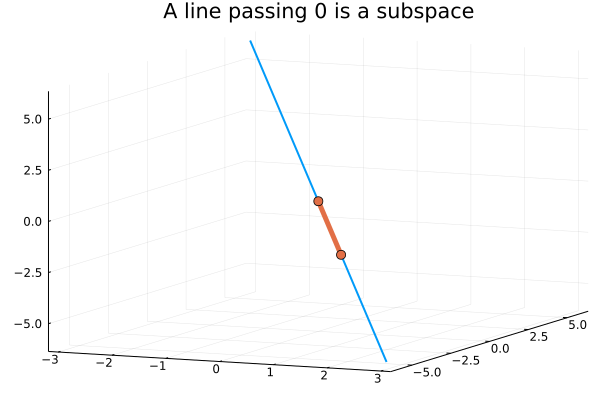

In [3]:
x = [1, -2, -2]
α = -3:0.1:3
f = x * α'
plt = plot3d(
    f[1, :], 
    f[2, :], 
    f[3, :],
    title = "A line passing 0 is a subspace",
    lw = 2,
    legend = false
)
plot!(plt, [0, x[1]], [0, x[2]], [0, x[3]], arrow = true, lw = 5, marker = 5)

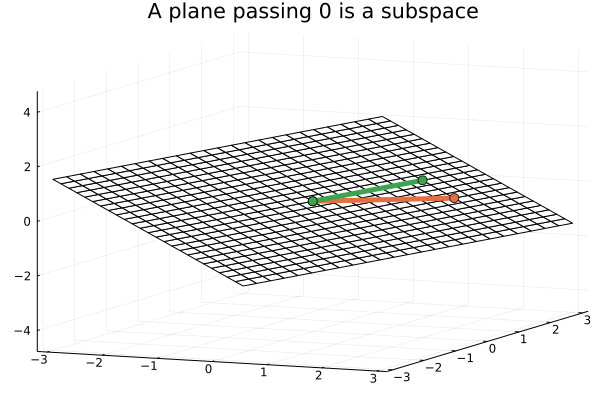

In [4]:
x1 = [2, 1, 0]
x2 = [2, 0, 1]

x = -3:0.25:3
y = -3:0.25:3
# h = a1 * x + a2 * y is linear and has to pass x1, x2
# so [2 1; 2 0] * [a1, a2] = [0, 1]
# [a1, a2] = [2 1; 2 0] \ [0, 1] = [0.5, -1]
h(x, y) = 0.5x - y;

plt = wireframe(x, y, h, title = "A plane passing 0 is a subspace")
plot!(plt, [0, x1[1]], [0, x1[2]], [0, x1[3]], 
    arrow = true, lw = 5, legend = false, marker = 5)
plot!(plt, [0, x2[1]], [0, x2[2]], [0, x2[3]], 
    arrow = true, lw = 5, legend = false, marker = 5)

## Span

- The **span** of a set of $\mathbf{x}_1,\ldots,\mathbf{x}_k \in \mathbb{R}^n$, defined as the set of all possible linear combinations of $\mathbf{x}_i$s
$$
    \text{span} \{\mathbf{x}_1,\ldots,\mathbf{x}_k\} = \left\{\sum_{i=1}^k \alpha_i \mathbf{x}_i: \alpha_i \in \mathbb{R} \right\},
$$
is a vector space in $\mathbb{R}^n$.

    Proof: TODO in class.

## Four fundamental subspaces

<img src="./four_fundamental_subspaces.png" width=400 align="center"/>

Let $\mathbf{A}$ be an $m \times n$ matrix
\begin{eqnarray*}
    \mathbf{A} = \begin{pmatrix}
    \mid & & \mid \\
    \mathbf{a}_1 & \ldots & \mathbf{a}_n \\
    \mid & & \mid    
    \end{pmatrix}.
\end{eqnarray*}

1. The **column space** of $\mathbf{A}$ is
\begin{eqnarray*}
    \mathcal{C}(\mathbf{A}) &=& \{ \mathbf{y} \in \mathbb{R}^m: \mathbf{y} = \mathbf{A} \mathbf{x} \text{ for some } \mathbf{x} \in \mathbb{R}^n \} \\
    &=& \text{span}\{\mathbf{a}_1, \ldots, \mathbf{a}_n\}.
\end{eqnarray*}
Sometimes it is also called the **image** or **range** or **manifold** of $\mathbf{A}$.

2. The **row space** of $\mathbf{A}$ is
\begin{eqnarray*}
    \mathcal{R}(\mathbf{A}) &=& \mathcal{C}(\mathbf{A}') \\
    &=& \{ \mathbf{y} \in \mathbb{R}^n: \mathbf{y} = \mathbf{A}' \mathbf{x} \text{ for some } \mathbf{x} \in \mathbb{R}^m \}.
\end{eqnarray*}

3. The **null space** or **kernel** of $\mathbf{A}$ is
\begin{eqnarray*}
    \mathcal{N}(\mathbf{A}) = \{\mathbf{x} \in \mathbb{R}^n: \mathbf{A} \mathbf{x} = \mathbf{0}\}.
\end{eqnarray*}

4. The **left null space** $\mathbf{A}$ is
\begin{eqnarray*}
    \mathcal{N}(\mathbf{A}') = \{\mathbf{x} \in \mathbb{R}^m: \mathbf{A}' \mathbf{x} = \mathbf{0}\}.
\end{eqnarray*}

TODO: show these 4 sets are vector spaces.

* Example: Draw the four subspaces of matrix $\mathbf{A} = \begin{pmatrix} 1 & -2 & -2 \\ 3 & -6 & -6 \end{pmatrix}$. TODO in class.

* Example: Interpret the four subspaces of the incidence matrix of a directed graph. TODO (maybe in homework).

## Effects of matrix multiplication on column/row space

- $\mathcal{C}(\mathbf{C}) \subseteq \mathcal{C}(\mathbf{A})$ if and only if $\mathbf{C} = \mathbf{A} \mathbf{B}$ for some matrix $\mathbf{B}$.

    Proof: The _if_ part is easily verified since each column of $\mathbf{C}$ is a linear combination of columns of $\mathbf{A}$. For the _only if_ part, assuming $\mathcal{C}(\mathbf{C}) \subseteq \mathcal{C}(\mathbf{A})$, each column of $\mathbf{C}$ is a linear combination of columns of $\mathbf{A}$. In other words $\mathbf{c}_j = \mathbf{A} \mathbf{b}_j$ for some $\mathbf{b}_j$. Therefore $\mathbf{C} = \mathbf{A} \mathbf{B}$, where $\mathbf{B}$ has columns $\mathbf{b}_j$.
    
- $\mathcal{R}(\mathbf{C}) \subseteq \mathcal{C}(\mathbf{A})$ if and only if $\mathbf{C} = \mathbf{B} \mathbf{A}$ for some matrix $\mathbf{B}$.

    Proof is similar to above.
    
- $\mathcal{N}(\mathbf{B}) \subseteq \mathcal{N}(\mathbf{A} \mathbf{B})$.

    Proof. For any $\mathbf{x} \in \mathcal{N}(\mathbf{B})$, $\mathbf{A} \mathbf{B} \mathbf{x} = \mathbf{A} (\mathbf{B} \mathbf{x}) = \mathbf{A} \mathbf{0} = \mathbf{0}$. Thus $\mathbf{x} \in \mathcal{N}(\mathbf{A} \mathbf{B})$.    

## Essential disjointness of four fundamental subspaces

- **Row space and null space of a matrix are essentially disjoint.** For any matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$,
$$
\mathcal{R}(\mathbf{A}) \cap \mathcal{N}(\mathbf{A}) = \{\mathbf{0}_n\}.
$$

    Proof: If $\mathbf{x} \in \mathcal{R}(\mathbf{A}) \cap \mathcal{N}(\mathbf{A})$, then $\mathbf{x} = \mathbf{A}' \mathbf{u}$ for some $\mathbf{u}$ and $\mathbf{A} \mathbf{x} = \mathbf{0}$. Thus $\mathbf{x}' \mathbf{x} = \mathbf{u}' \mathbf{A} \mathbf{x} = \mathbf{u}' \mathbf{0} = 0$, which implies $\mathbf{x} = \mathbf{0}$. This shows $\mathcal{R}(\mathbf{A}) \cap \mathcal{N}(\mathbf{A}) \subseteq \{\mathbf{0}\}$. The other direction is trivial.

- **Column space and left null space of a matrix are essentially disjoint.** For any matrix $\mathbf{A} \in \mathbb{R}^n$,
$$
\mathcal{C}(\mathbf{A}) \cap \mathcal{N}(\mathbf{A}') = \{\mathbf{0}_n\}.
$$

    Proof: Apply above result to $\mathbf{A}'$.  

- Null space of Gram matrix.
\begin{eqnarray*}
    \mathcal{N}(\mathbf{A}'\mathbf{A}) &=& \mathcal{N}(\mathbf{A}) \\
    \mathcal{N}(\mathbf{A}\mathbf{A}') &=& \mathcal{N}(\mathbf{A}').
\end{eqnarray*}

    Proof: For the first equation, we note
\begin{eqnarray*}
    & & \mathbf{x} \in \mathcal{N}(\mathbf{A}) \\
    &\Rightarrow& \mathbf{A} \mathbf{x} = \mathbf{0} \\
    &\Rightarrow& \mathbf{A}'\mathbf{A} \mathbf{x} = \mathbf{0} \\
    &\Rightarrow& \mathbf{x} \in \mathcal{N}(\mathbf{A}'\mathbf{A}).
\end{eqnarray*}
This shows $\mathcal{N}(\mathbf{A}) \subseteq \mathcal{N}(\mathbf{A}'\mathbf{A})$. To show the other direction $\mathcal{N}(\mathbf{A}) \supseteq \mathcal{N}(\mathbf{A}'\mathbf{A})$, we note
\begin{eqnarray*}
    & & \mathbf{x} \in \mathcal{N}(\mathbf{A}'\mathbf{A}) \\
    &\Rightarrow& \mathbf{A}'\mathbf{A} \mathbf{x} = \mathbf{0} \\
    &\Rightarrow& \mathbf{x}' \mathbf{A}' \mathbf{A} \mathbf{x} = 0 \\
    &\Rightarrow& \|\mathbf{A} \mathbf{x}\|^2 = 0 \\
    &\Rightarrow& \mathbf{A} \mathbf{x} = \mathbf{0} \\
    &\Rightarrow& \mathbf{x} \in \mathcal{N}(\mathbf{A}).
\end{eqnarray*} 

    For the second equation, we apply the first equation to $\mathbf{B} = \mathbf{A}'$. 

## Basis of a subspace

- A set of linearly independent vectors that span a vector space $\mathcal{S}$ is called a **basis** of ${\cal S}$.

- Let $\mathcal{A} = \{\mathbf{a}_1, \ldots, \mathbf{a}_k\}$ be a basis of a vector space $\mathcal{S}$. Then any vector $\mathbf{x} \in \mathcal{S}$ can be expressed **uniquely** as a linear combination of vectors in $\mathcal{A}$.

    Proof: Suppose $\mathbf{x}$ can be expressed by two linear combinations
$$
    \mathbf{x} = \alpha_1 \mathbf{a}_1 + \cdots + \alpha_k \mathbf{a}_k = \beta_1 \mathbf{a}_1 + \cdots + \beta_k \mathbf{a}_k.
$$
Then $(\alpha_1 - \beta_1) \mathbf{a}_1 + \cdots (\alpha_k - \beta_k) \mathbf{a}_k = \mathbf{0}$. Since $\mathbf{a}_i$ are linearly independent, we have $\alpha_i = \beta_i$ for all $i$.

- Let $\mathcal{A}=\{\mathbf{a}_1, \ldots, \mathbf{a}_k\}$ and $\mathcal{B}=\{\mathbf{b}_1, \ldots, \mathbf{b}_l\}$ be two basis of a vector space $\mathcal{S} \subset \mathbb{R}^n$. Then $k = l$.

    Proof. Define two matrices
$$
    \mathbf{A} = \begin{pmatrix}
    \mid & & \mid \\
    \mathbf{a}_1 & \ldots & \mathbf{a}_k \\
    \mid & & \mid    
    \end{pmatrix} \in \mathbb{R}^{n \times k}, \quad \mathbf{B} = \begin{pmatrix}
    \mid & & \mid \\
    \mathbf{b}_1 & \ldots & \mathbf{b}_l \\
    \mid & & \mid    
    \end{pmatrix} \in \mathbb{R}^{n \times l}.
$$
Since $\mathcal{B}$ spans $\mathcal{S}$, $\mathbf{a}_i = \mathbf{B} \mathbf{c}_i$ for some vector $\mathbf{c}_i \in \mathbb{R}^l$ for $i=1,\ldots,k$. Let
$$
    \mathbf{C} = \begin{pmatrix}
    \mid & & \mid \\
    \mathbf{c}_1 & \ldots & \mathbf{c}_k \\
    \mid & & \mid    
    \end{pmatrix} \in \mathbb{R}^{l \times k}.
$$
Then $\mathbf{A} = \mathbf{B} \mathbf{C}$. Since
$$
    \mathcal{N}(\mathbf{C}) \subseteq \mathcal{N}(\mathbf{A}) = \{\mathbf{0}_n\}.
$$
The only solution to $\mathbf{C} \mathbf{x} = \mathbf{0}_l$ is $\mathbf{0}_k$. In other words, the columns of $\mathbf{C}$ are linearly independent. Thus, by the independence-dimension inequality, $\mathbf{C}$ has at least as many rows as columns. That is $k \le l$. Lastly we reverse the role of $\mathbf{A}$ and $\mathbf{B}$ to obtain $l \le k$.
    
- The **dimension** of a vector space $\mathcal{S}$, denoted by $\text{dim}(\mathcal{S})$, is defined as 
    1. the number of vectors in _any_ basis of $\mathcal{S}$, **or** 
    2. the maximmal number of linearly independent vectors in $\mathcal{S}$, **or**
    3. the minimal number of vectors that span $\mathcal{S}$. 

- **Monotonicity of dimension**. If $\mathcal{S}_1 \subseteq \mathcal{S}_2 \subseteq \mathbb{R}^n$ are two vector spaces of same order, then $\text{dim}(\mathcal{S}_1) \le \text{dim}(\mathcal{S}_2)$.

    Proof: Any independent set of vectors in $\mathcal{S}_1$ also live in $\mathcal{S}_2$. Thus the maximal number of independent vectors in $\mathcal{S}_2$ can only be larger or equal to the maximal number of indepedent vectors in $\mathcal{S}_1$.